# Telecom Churn Case Study
***

### Group Details
<i><b>1. Amarpal Singh 2. Ankit Bhatia 3. Saurabh Saxena</b></i>

### <u>Table of Contents</u>


[I. Prerequisite](#prerequisite)

[II. Import Libraries and set required parameters](#library)

[III. Data Understanding & Preprocessing](#data)

[IV. Business Understanding](#business)

[V. Exploratory Data Analysis](#eda)

[VI. Class Balancing](#balancing)

[VII. Feature Scaling & Train-Test Split](#scaling)

[VIII. PCA: Dimensionality Reduction](#pca)

[IX. Model Building & Evaluation](#model)

[X. Model Summary](#summary)

[X. Conclusion](#conclusion)

<a id='prerequisite'></a>

## I. Prerequisite

1. Place __'telecom_churn_data.csv'__ input file at your current working directory before running this code.

2. __Install SMOTE__ library using following command:
__<i>"conda install -c glemaitre imbalanced-learn"</i>__

<a id='library'></a>

## II. Import Libraries and set required parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 300) # to display all the columns

import time
from sklearn import metrics

from imblearn.over_sampling import SMOTE #command to install "conda install -c glemaitre imbalanced-learn"

#PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Logistic
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# SVM
from sklearn.svm import SVC

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

<a id='data'></a>

## III. Data Understanding & Preprocessing

In [2]:
data = pd.read_csv('telecom_churn_data.csv')
print(data.shape)
data.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,0.000,0.000,nan,nan,0.160,nan,nan,nan,4.130,nan,nan,nan,1.150,nan,nan,nan,5.440,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,0.000,0.000,5.440,0.000,nan,nan,

#### Data Preprocessing

#### 1. Check for Duplicate Values

In [3]:
len(data[data.mobile_number.duplicated()==True])

0

<i>There are no duplicate rows in the dataset.</i>

#### 2. Check for Missing Values

First we will filter out the columns(col_with_NA_values) where NA values are more than 70%.

1. Set I  : Replace missing values with 0.
2. Set II : Remove columns.

In [4]:
col_with_NA_values = data.isnull().sum()
col_with_NA_values = pd.DataFrame(col_with_NA_values[col_with_NA_values.values >(0.70*len(data))])
print('Below are the columns with more than 70% NA values')
col_with_NA_values.index

Below are the columns with more than 70% NA values


Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [5]:
def impute_values(dataframe,columns,approach):
    '''impute_values function will impute the missing data(numeric) in the dataframe column.
        dataframe :: Dataframe Name
        columns    :: Column name(s)
            1. Delete the column
            2. Replace missing value with 0
    '''
    dataframe_filtered = dataframe.copy()
    if approach == 1:
        dataframe_filtered.drop(dataframe_filtered[columns],axis=1,inplace=True)
    if approach == 2:
        dataframe_filtered[columns].fillna(0,inplace =True)        
        
    return dataframe_filtered

#### Set I : Replace missing values with 0.
There are several columns with NA values which can't be deleted directly as they are used to filter high value customers.
So we will replace those missing values with 0.

In [6]:
NA_with_0 = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',\
                'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

data = impute_values(data,NA_with_0,2)
data.shape

(99999, 226)

#### Set II : Drop columns where missing values are more than 70%

In [7]:
col_to_be_deleted = col_with_NA_values.index[~col_with_NA_values.index.isin(NA_with_0)]
data = impute_values(data,col_to_be_deleted,1)
data.shape

(99999, 194)

#### 3. Replace rest missing values with 0.

In [8]:
data = data.fillna(0)

#### 4. Remove columns where number of unique value is only 1.
Those column will acts as a constant and will not add any value to the model.

In [9]:
unique = data.nunique()
unique = unique[unique.values == 1]
unique

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64

In [10]:
data = data.drop(labels = list(unique.index), axis =1)
data.shape

(99999, 181)

#### 5. Remove Non-numeric columns & Unique Identity column.

As all non-numeric columns in the dataset are of date-type, they will not add any value to the model as we already have different columns to consider the calculations for  first, second, third and fourth month respectively. 

In [11]:
non_numeric_cols = data.select_dtypes(include=['object'])
non_numeric_cols.columns

Index(['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

In [12]:
data = data.drop(non_numeric_cols,axis=1)
telecom = data.drop(['mobile_number'],axis=1)
telecom.shape

(99999, 173)

<a id='business'></a>

## IV. Data & Business Understanding

#### 1. Derive New Features 

    Good Phase Columns : Average of first two months
    Action Phase Columns : Third Month
    Bad Phase Columns : Fourth Month

As we are working over a four-month window, the __first two months are the ‘good’ phase__, the third month is the ‘action’ phase__, while the fourth month is the ‘churn’ phase.

In [13]:
first_month = telecom.columns[telecom.columns.str.contains('_6')]
second_month = telecom.columns[telecom.columns.str.contains('_7')]
third_month = telecom.columns[telecom.columns.str.contains('_8')]
fourth_month = telecom.columns[telecom.columns.str.contains('_9')]

good_phase_cols = first_month.str.replace('_6','_good')
action_phase_cols = third_month.str.replace('_8','_action')
bad_phase_cols = fourth_month.str.replace('_9','_bad')

for i in range(0,len(first_month)):
    telecom[good_phase_cols[i]] = telecom[first_month[i]] + telecom[second_month[i]]
    telecom[action_phase_cols[i]] = telecom[third_month[i]]
    telecom[bad_phase_cols[i]] = telecom[fourth_month[i]]
telecom[good_phase_cols] = telecom[good_phase_cols]/2

Now remove first,second,third and fourth month columns as we have consolidated it to good,action and bad phase columns.

In [14]:
telecom = telecom.drop(first_month,axis=1)
telecom = telecom.drop(second_month,axis=1)
telecom = telecom.drop(third_month,axis=1)
telecom = telecom.drop(fourth_month,axis=1)
telecom.shape

(99999, 131)

#### 2. Important - Filter : High Value Customers

As per the problem statement, approximately 80% of revenue comes from the top 20% customers (called high-value customers). And if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

So, we will filter out the high value customers as per following condition : <i>Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).</i>

In [15]:
# Filter high-value customers (Recharged amount more than or equal to 70th percentile)
q70 = telecom["total_rech_amt_good"].quantile(0.7)
telecom = telecom[telecom["total_rech_amt_good"] > q70]
q70

368.5

In [16]:
telecom.shape

(29979, 131)

#### 3. Tag churned customers based on the usage of the services in last month(Bad Phase):

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [17]:
last_month_usage = telecom[['total_ic_mou_bad','total_og_mou_bad','vol_2g_mb_bad','vol_3g_mb_bad']]
last_month_usage['Total'] = last_month_usage.sum(axis=1)

Now tag churn = 1 if Sum of these columns is 0(that is customer has not used any of the services), 
otherwise 0.


In [18]:
last_month_usage['churn'] = last_month_usage['Total'].apply(lambda x: 0 if x > 0 else 1)

In [19]:
telecom.insert(0, 'churn', last_month_usage['churn'])

In [20]:
telecom.head()

,churn,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_good,arpu_action,arpu_bad,onnet_mou_good,onnet_mou_action,onnet_mou_bad,offnet_mou_good,offnet_mou_action,offnet_mou_bad,roam_ic_mou_good,roam_ic_mou_action,roam_ic_mou_bad,roam_og_mou_good,roam_og_mou_action,roam_og_mou_bad,loc_og_t2t_mou_good,loc_og_t2t_mou_action,loc_og_t2t_mou_bad,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2m_mou_bad,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2f_mou_bad,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_t2c_mou_bad,loc_og_mou_good,loc_og_mou_action,loc_og_mou_bad,std_og_t2t_mou_good,std_og_t2t_mou_action,std_og_t2t_mou_bad,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2m_mou_bad,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_t2f_mou_bad,std_og_mou_good,std_og_mou_action,std_og_mou_bad,isd_og_mou_good,isd_og_mou_action,isd_og_mou_bad,spl_og_mou_good,spl_og_mou_action,spl_og_mou_bad,og_others_good,og_others_action,og_others_bad,total_og_mou_good,total_og_mou_action,total_og_mou_bad,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_ic_t2t_mou_bad,loc_ic_t2m_mou_good,loc_ic_t2m_mou_action,loc_ic_t2m_mou_bad,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_t2f_mou_bad,loc_ic_mou_good,loc_ic_mou_action,loc_ic_mou_bad,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_ic_t2t_mou_bad,std_ic_t2m_mou_good,std_ic_t2m_mou_action,std_ic_t2m_mou_bad,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_t2f_mou_bad,std_ic_mou_good,std_ic_mou_action,std_ic_mou_bad,total_ic_mou_good,total_ic_mou_action,total_ic_mou_bad,spl_ic_mou_good,spl_ic_mou_action,spl_ic_mou_bad,isd_ic_mou_good,isd_ic_mou_action,isd_ic_mou_bad,ic_others_good,ic_others_action,ic_others_bad,total_rech_num_good,total_rech_num_action,total_rech_num_bad,total_rech_amt_good,total_rech_amt_action,total_rech_amt_bad,max_rech_amt_good,max_rech_amt_action,max_rech_amt_bad,last_day_rch_amt_good,last_day_rch_amt_action,last_day_rch_amt_bad,total_rech_data_good,total_rech_data_action,total_rech_data_bad,av_rech_amt_data_good,av_rech_amt_data_action,av_rech_amt_data_bad,vol_2g_mb_good,vol_2g_mb_action,vol_2g_mb_bad,vol_3g_mb_good,vol_3g_mb_action,vol_3g_mb_bad,monthly_2g_good,monthly_2g_action,monthly_2g_bad,sachet_2g_good,sachet_2g_action,sachet_2g_bad,monthly_3g_good,monthly_3g_action,monthly_3g_bad,sachet_3g_good,sachet_3g_action,sachet_3g_bad
7,1,802,57.740,19.380,18.740,0.000,1209.515,3171.480,500.000,56.260,52.290,0.000,510.295,325.910,0.000,24.860,31.640,0.000,18.165,38.060,0.000,41.385,40.280,0.000,378.005,162.280,0.000,58.635,53.230,0.000,0.000,0.000,0.000,478.035,255.790,0.000,13.795,12.010,0.000,40.825,49.140,0.000,13.370,16.680,0.000,68.000,77.840,0.000,0.090,10.010,0.000,2.250,6.500,0.000,0.000,0.000,0.000,548.385,350.160,0.000,45.200,27.310,0.000,219.525,121.190,0.000,126.810,39.530,0.000,391.555,188.040,0.000,24.360,30.390,0.000,109.215,141.330,0.000,43.215,22.210,0.000,176.810,193.940,0.000,592.250,428.740,0.000,0.105,0.000,0.000,8.295,31.590,0.000,15.465,15.140,0.000,5.000,7,3,1185.000,3638,0,1185.000,1580,0,0.000,779,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0,0,0.000,0,0,0.000,0,0
8,0,315,21.030,910.650,122.160,0.000,435.472,137.362,166.787,382.360,35.080,33.460,87.645,136.480,108.710,0.000,0.000,0.000,0.000,0.000,0.000,257.360,12.490,26.130,75.770,50.540,34.580,0.000,0.000,0.000,0.000,7.150,0.000,333.135,63.040,60.710,124.995,22.580,7.330,11.865,75.690,74.130,0.000,0.000,0.000,136.870,98.280,81.460,0.000,0.000,0.000,0.000,10.230,0.000,0.000,0.000,0.000,470.010,171.560,142.180,16.840,0.310,4.030,35.780,15.480,17.340,0.000,0.000,0.000,52.630,15.790,21.380,0.290,0.100,0.000,13.255,0.650,13.530,0.000,0.000,0.000,13.545,0.750,13.530,66.175,16.540,34.910,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,20.000,14,15,519.000,120,186,122.000,30,36,25.000,10,0,1.000,3.000,0.000,88.500,69.000,0.000,178.000,0.030,0.000,375.475,11.940,0.000,0.500,0,0,0.500,3,0,0.000,0,0,0.000,0,0
13,0,2607,0.000,0.000,0.000,0.000,349.259,593.2

<a id='eda'></a>

## V. Exploratory Data Analysis

#### Average Revenue per user for Good, Action and Bad Phase

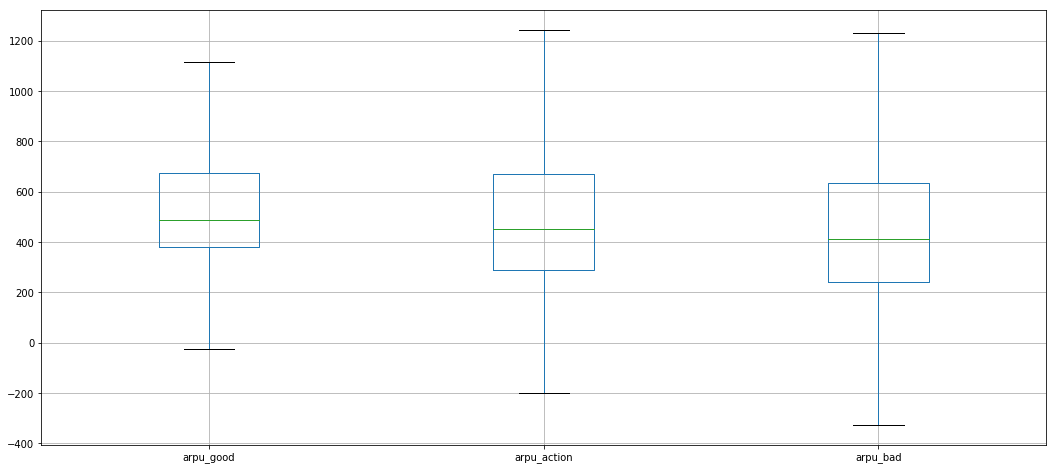

In [21]:
arpu_cols = telecom.columns[telecom.columns.str.contains('arpu')]
telecom[arpu_cols].boxplot(figsize=(18,8),showfliers=False)
plt.show()

As customer moves from good phase to bad phase, Average revenue per user goes down.

#### Roaming Usage During different Phases

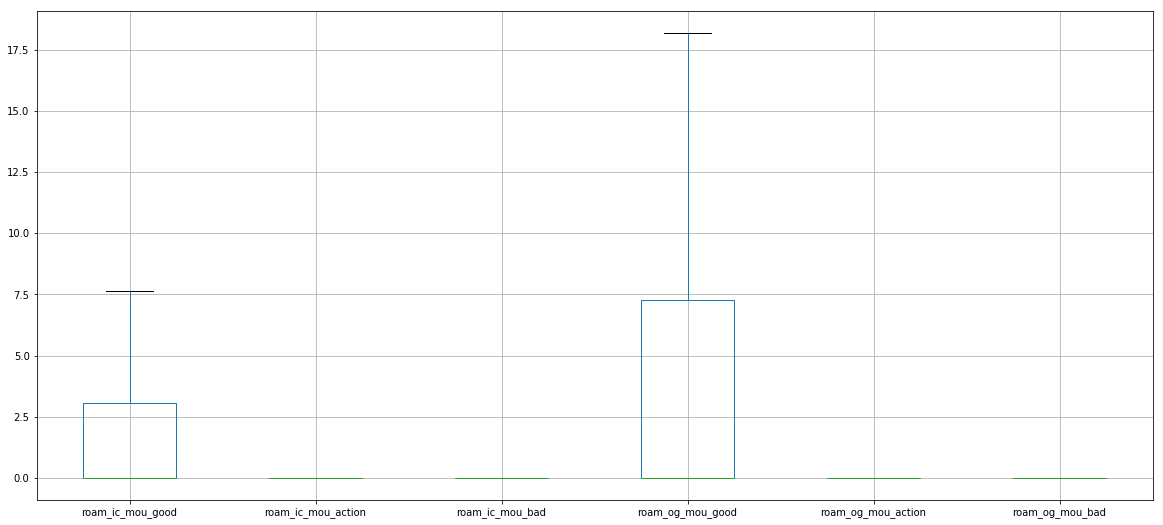

In [22]:
roam_cols = telecom.columns[telecom.columns.str.contains('roam')]
telecom[roam_cols].boxplot(figsize=(20,9),showfliers=False)
plt.show()

Customer uses roaming services only in good phase(Ist two months) and not after that.

<a id='balancing'></a>

## VI. Class Balancing

In [23]:
#Now remove all the bad-phase columns in the dataset.
attributes_to_del = list(telecom.columns[telecom.columns.str.endswith('bad')])
telecom = telecom.drop(attributes_to_del,axis=1)

telecom.shape

(29979, 90)

In [24]:
ratio_churn_to_non_churn = telecom[telecom['churn']==0]['churn'].count() / telecom[telecom['churn']==1]['churn'].count()
ratio_churn_to_non_churn

10.579374275782156

#### As ratio of Churn to Non-Churn is only 10%, we have to do Class Balancing.

In [25]:
# Define dependent(y) & independent(X) variables.
X,y = telecom.drop(['churn'], axis=1),telecom['churn']

sm = SMOTE(random_state=27, ratio = 1.0)
X_res, y_res = sm.fit_sample(X, y)

X = pd.DataFrame(X_res,  columns=X.columns)
y =  pd.DataFrame(y_res).rename(columns={ 0 : 'churn'})

<a id='scaling'></a>

## VII. Feature Scaling & Train-Test Split

In [26]:
# Scale features to [0,1], some models are sensitive to non-scaled data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
#sc = StandardScaler()

scaled = sc.fit_transform(X)
X = pd.DataFrame(scaled, index=X.index, columns=X.columns)

With __StandardScaler()__,  we were getting __54 variables__ for 90% variance,With __MinMaxScaler()__,  we are getting __19 variables__ for 90% variance.
__Therefore we have used MinMaxScaler()__

In [27]:
### Split training data to train & test
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
X_train.shape

(43824, 89)

<a id='pca'></a>

## VIII. PCA: Dimensionality Reduction

There are 154 features, it will be difficult and time consuming task to reduce the features using p-value and VIF score.
So let's use PCA to do that.

In [28]:
pca = PCA(svd_solver='randomized', random_state=27)
#pca = PCA(.90,random_state=27)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=27,
  svd_solver='randomized', tol=0.0, whiten=False)

In [29]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[3], 'Feature':X.columns})
pcs_df.head(10)

,Feature,PC1,PC2,PC3
0,aon,0.963,0.154,-0.025
1,aug_vbc_3g,0.011,-0.029,0.054
2,jul_vbc_3g,0.017,-0.054,0.080
3,jun_vbc_3g,0.011,-0.046,0.056
4,sep_vbc_3g,0.003,-0.003,0.008
5,arpu_good,-0.001,0.036,-0.003
6,arpu_action,0.009,0.028,0.025
7,onnet_mou_good,-0.047,0.322,0.419
8,onnet_mou_action,-0.005,0.161,0.235
9,offnet_mou_good,-0.027,0.241,-0.461


#### Screeplot - plotting the cumulative variance against the number of components

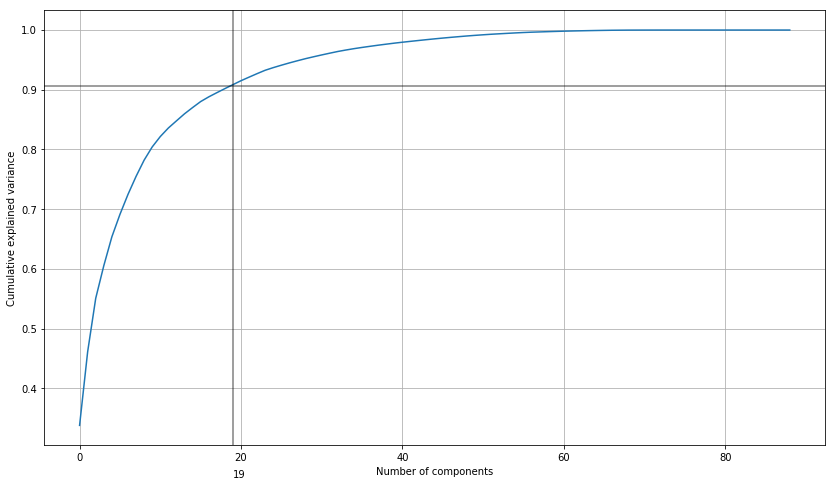

In [30]:
fig = plt.figure(figsize = (14,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
# Horizontal & Vertical  Line
plt.axhline(y=0.907, color='k', linestyle='-',alpha = 0.5)
plt.axvline(x=19, color='k', linestyle='-',alpha = 0.5)
plt.text(19, 0.25,'19')
plt.grid()
plt.show()

#### Looks like 19 components are enough to describe more than 90% of the variance in the dataset
- We'll choose 19 components for our modeling

Actual Dimensions 89, after PCA, 19

In [31]:
#X_train_pca = pca.transform(X_train)
#X_test_pca = pca.transform(X_test)
#X_train_pca.shape

pca_final = IncrementalPCA(n_components=19)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)
X_train_pca.shape

(43824, 19)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [32]:
#creating correlation matrix for the principal components
corrmat = np.round(np.corrcoef(X_train_pca.transpose()),decimals=2)

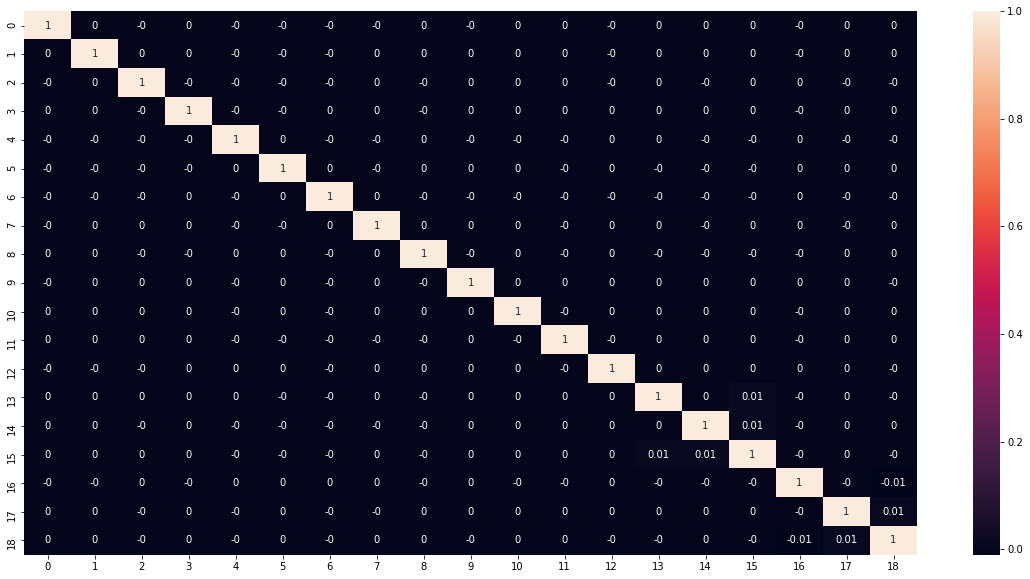

Execution Time:: 0.8736023902893066


In [33]:
#plotting the correlation matrix
start_time = time.time()
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()
print('Execution Time::',time.time() - start_time)

In [34]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.01 , min corr:  -0.01


#### Indeed - there is no correlation between any two components! 

<a id='model'></a>

## IX. Model Building & Evaluation

In [35]:
# Create new dataframe model_summary that will contain important information for each model.
model_summary = pd.DataFrame(columns=['Algorithm','Execution_Time','Accuracy','Sensitivity','Specificity','Precision',\
                                      'F1-score'])
model_summary = model_summary.set_index('Algorithm')

In [36]:
def add_model_summary(model,name):
    start_time = time.time()
    # Fit Model
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Stats
    Execution_Time = time.time() - start_time
    Accuracy = metrics.accuracy_score(y_true=y_test, y_pred= y_pred)
    confusion= metrics.confusion_matrix(y_true=y_test, y_pred= y_pred)
    TN = confusion[0, 0]  # Actual - Non-churn, Predicted - Non-churn
    FP = confusion[0, 1]  # Actual - Non-churn, Predicted - Churn
    FN = confusion[1, 0]  # Actual - Churn, Predicted - Non-churn
    TP = confusion[1, 1]  # Actual - Churn, predicted - Churn
    Sensitivity = TP / float(FN + TP)
    Specificity = TN / float(TN + FP)
    Precision = TP / float(TP + FP)
    F1score = (2*Precision*Sensitivity)/(Precision+Sensitivity)
    
    # Add Modal Summary in the dataset
    model_summary.loc[name] = [Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1score]
    display(model_summary)
    return pd.DataFrame(y_pred)

In [37]:
def calculateChurnPercentageforModels(dataframe):
    dataframe.rename(columns={ 0 : 'churn_original'},inplace=True)
    return round(len(dataframe[dataframe['churn_original']==1])/len(dataframe)*100,2)
churnPercentage=pd.DataFrame(columns=['Model Name','Churn Percentage'])
churnPercentage=churnPercentage.set_index('Model Name')

### 1. Logistic Regression

In [38]:
name = 'Logistic Regression'
logistic_model = LogisticRegression()
logistic_y_pred=add_model_summary(logistic_model,name)

,Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1-score
Algorithm,,,,,,
Logistic Regression,0.280,0.824,0.835,0.812,0.819,0.827


#### Validating Probabilty for Logistic Rregression

In [39]:
y_pred_prob_df = pd.DataFrame(logistic_model.predict_proba(X_test_pca)).iloc[:,[1]]
y_test_df = pd.DataFrame(y_test)
y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_prediction = pd.concat([y_test_df,y_pred_prob_df],axis=1)
y_prediction=y_prediction.rename(columns={ 1 : 'Churn_Probablity'})

#### Mapping Churn to 1 if pobablity of each customer is more than .5

In [40]:
y_prediction['predicted'] = y_prediction.Churn_Probablity.map( lambda x: 1 if x > 0.5 else 0)
len(y_prediction[y_prediction["predicted"]==1])/len(y_prediction)

0.5139649507119387

In [41]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_prediction[i]= y_prediction.Churn_Probablity.map( lambda x: 1 if x > i else 0)
y_prediction.head()

,churn,Churn_Probablity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.755,1,1,1,1,1,1,1,1,1,0,0
1,1,0.716,1,1,1,1,1,1,1,1,1,0,0
2,0,0.507,1,1,1,1,1,1,1,0,0,0,0
3,0,0.769,1,1,1,1,1,1,1,1,1,0,0
4,1,0.962,1,1,1,1,1,1,1,1,1,1,1


In [42]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_prediction.churn, y_prediction[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

       prob  accuracy  sensi  speci
0.000 0.000     0.504  0.000  1.000
0.100 0.100     0.662  0.342  0.978
0.200 0.200     0.731  0.506  0.952
0.300 0.300     0.775  0.627  0.921
0.400 0.400     0.804  0.725  0.882
0.500 0.500     0.824  0.812  0.835
0.600 0.600     0.829  0.881  0.778
0.700 0.700     0.812  0.922  0.704
0.800 0.800     0.750  0.956  0.546
0.900 0.900     0.580  0.988  0.177


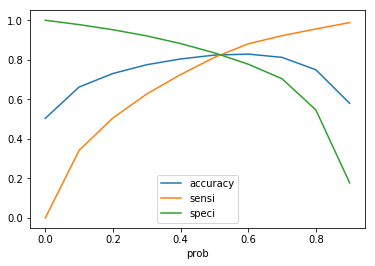

In [43]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [44]:
y_prediction['final_predicted'] = y_prediction.Churn_Probablity.map( lambda x: 1 if x > 0.5 else 0)
metrics.accuracy_score( y_prediction.churn, y_prediction.final_predicted)

0.823658269441402

In [45]:
logictic_pred_percentage=round(len(y_prediction[y_prediction["final_predicted"]==1])/(len(y_prediction))*100,2)
print(logictic_pred_percentage)

51.4


In [46]:
churnPercentage.loc[name]=[calculateChurnPercentageforModels(logistic_y_pred)]

### 2. SVM

Linear Model

In [47]:
linear_SVM_model = SVC(kernel='linear')
name_linear = 'SVM Linear Model'

svm_linear_y_pred=add_model_summary(linear_SVM_model,name=name_linear)
svm_linear_y_pred.rename(columns={ 0 : 'churn_original'},inplace=True)
churnPercentage.loc[name_linear]=calculateChurnPercentageforModels(svm_linear_y_pred)

,Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1-score
Algorithm,,,,,,
Logistic Regression,0.280,0.824,0.835,0.812,0.819,0.827
SVM Linear Model,43.949,0.831,0.822,0.840,0.839,0.830


Non-Linear Model

In [48]:
non_linear_SVM_model = SVC(kernel='rbf')
name_non_linear = 'SVM-Non Linear Model'

svm_non_linear=add_model_summary(non_linear_SVM_model,name=name_non_linear)
churnPercentage.loc[name_non_linear]=calculateChurnPercentageforModels(svm_non_linear)

,Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1-score
Algorithm,,,,,,
Logistic Regression,0.280,0.824,0.835,0.812,0.819,0.827
SVM Linear Model,43.949,0.831,0.822,0.840,0.839,0.830
SVM-Non Linear Model,79.448,0.823,0.818,0.828,0.828,0.823


### 3. Decision Tree

In [49]:
name = 'Decision Tree'
model = DecisionTreeClassifier()

decision_y_pred=add_model_summary(model,name)
churnPercentage.loc[name]=calculateChurnPercentageforModels(decision_y_pred)

,Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1-score
Algorithm,,,,,,
Logistic Regression,0.280,0.824,0.835,0.812,0.819,0.827
SVM Linear Model,43.949,0.831,0.822,0.840,0.839,0.830
SVM-Non Linear Model,79.448,0.823,0.818,0.828,0.828,0.823
Decision Tree,1.534,0.873,0.888,0.857,0.863,0.875


### 4. Random Forest

In [50]:
model = RandomForestClassifier()
name = 'Random Forest'
random_forest_y_pred=add_model_summary(model,name)

churnPercentage.loc[name]=calculateChurnPercentageforModels(random_forest_y_pred)
churnPercentage.head()

,Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1-score
Algorithm,,,,,,
Logistic Regression,0.280,0.824,0.835,0.812,0.819,0.827
SVM Linear Model,43.949,0.831,0.822,0.840,0.839,0.830
SVM-Non Linear Model,79.448,0.823,0.818,0.828,0.828,0.823
Decision Tree,1.534,0.873,0.888,0.857,0.863,0.875
Random Forest,2.181,0.923,0.919,0.926,0.927,0.923


,Churn Percentage
Model Name,
Logistic Regression,51.400
SVM Linear Model,49.320
SVM-Non Linear Model,49.730
Decision Tree,51.860
Random Forest,49.950


#### <i> Till now Random Forest gives the better performance both in terms of Accuracy & Sensitivity.</i>

So let's tune the hyperparameters for Random Forest.

### Hyperparameter Tuning for Random Forest

#### Grid Search to find optimal Hyperparameters for Random Forest

#### Commented the below section of hyperparameter tuning after getting the result, as it may take time while running the notebook again.

We can get accuracy of 0.84152772707 using {'max_depth': 17, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 300}

In [51]:
model = RandomForestClassifier()
name = 'Random Forest'


In [52]:
model = RandomForestClassifier(bootstrap=True,
                             max_depth=17,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=300)
name = 'Random Forest with Hypermaraters Tuning'

random_forest_y_pred_hp=add_model_summary(model,name)

churnPercentage.loc[name]=calculateChurnPercentageforModels(random_forest_y_pred_hp)

,Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1-score
Algorithm,,,,,,
Logistic Regression,0.280,0.824,0.835,0.812,0.819,0.827
SVM Linear Model,43.949,0.831,0.822,0.840,0.839,0.830
SVM-Non Linear Model,79.448,0.823,0.818,0.828,0.828,0.823
Decision Tree,1.534,0.873,0.888,0.857,0.863,0.875
Random Forest,2.181,0.923,0.919,0.926,0.927,0.923
Random Forest with Hypermaraters Tuning,47.600,0.846,0.815,0.877,0.870,0.842


<a id='summary'></a>

## X. Model Summary

In [53]:
display(model_summary)
display(churnPercentage)

,Execution_Time,Accuracy,Sensitivity,Specificity,Precision,F1-score
Algorithm,,,,,,
Logistic Regression,0.280,0.824,0.835,0.812,0.819,0.827
SVM Linear Model,43.949,0.831,0.822,0.840,0.839,0.830
SVM-Non Linear Model,79.448,0.823,0.818,0.828,0.828,0.823
Decision Tree,1.534,0.873,0.888,0.857,0.863,0.875
Random Forest,2.181,0.923,0.919,0.926,0.927,0.923
Random Forest with Hypermaraters Tuning,47.600,0.846,0.815,0.877,0.870,0.842


,Churn Percentage
Model Name,
Logistic Regression,51.400
SVM Linear Model,49.320
SVM-Non Linear Model,49.730
Decision Tree,51.860
Random Forest,49.950
Random Forest with Hypermaraters Tuning,47.160


<a id='conclusion'></a>

### Important Features

In [55]:
#rank all features
from sklearn.feature_selection import RFE
rfe = RFE(logistic_model, n_features_to_select=20)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank::::\n")
feature_ranking = sorted(list(zip(rfe.ranking_,X_train.columns)))
print(feature_ranking[0:20])

Features sorted by their rank::::

[(1, 'arpu_good'), (1, 'last_day_rch_amt_action'), (1, 'loc_ic_mou_action'), (1, 'loc_ic_t2m_mou_action'), (1, 'loc_og_mou_action'), (1, 'loc_og_t2m_mou_action'), (1, 'monthly_2g_action'), (1, 'monthly_3g_action'), (1, 'roam_ic_mou_good'), (1, 'roam_og_mou_action'), (1, 'sep_vbc_3g'), (1, 'spl_ic_mou_action'), (1, 'total_ic_mou_action'), (1, 'total_ic_mou_good'), (1, 'total_og_mou_action'), (1, 'total_rech_amt_good'), (1, 'total_rech_data_action'), (1, 'total_rech_num_action'), (1, 'total_rech_num_good'), (1, 'vol_2g_mb_action')]
